In [365]:
%run -i MyModel

In [366]:
import sys
sys.path.insert(0, "..")

In [364]:
from evaluation.EvalRSRunner import ChallengeDataset
import numpy as np

In [359]:
dataset = ChallengeDataset()

/home/fgiobergia/.cache/evalrs/evalrs_dataset
LFM dataset already downloaded. Skipping download.
Loading dataset.
Generating folds.
Generating dataset hashes.


In [360]:
train, test = dataset.get_sample_train_test()

In [367]:
model = MyModel(dataset.df_tracks, dataset.df_users, 100)

In [368]:
model.train(train)

OK
batch size 512 #epochs 2 emb dim 256 margin 0.75
Training with 13749158 records 29705 users 227612 tracks
Epoch 1/2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26854/26854 [04:52<00:00, 91.76it/s, loss=0.336]

Epoch 2/2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26854/26854 [04:51<00:00, 92.02it/s, loss=0.319]


In [369]:
mod = model.cmodel

In [370]:
train.groupby("user_id").size()[train.groupby("user_id").size()==10]

user_id
5357729     10
9315519     10
15242272    10
22160406    10
25787158    10
41172492    10
41548564    10
42922000    10
47133675    10
48160943    10
48211793    10
48779190    10
49070523    10
49120668    10
49453058    10
49628104    10
49635202    10
49679310    10
49768163    10
49825157    10
49851625    10
49967499    10
50033718    10
dtype: int64

In [374]:
train[train["user_id"]==15242272].merge(dataset.df_tracks, left_on="track_id", right_index=True)

,user_id,artist_id_x,album_id,track_id,timestamp,user_track_count,track,artist_id_y,artist,albums_id,albums
1003572515,15242272,51487,831945,381081,1330283015,8,Embraced,51487,Paul Cardall,"[133201, 831945, 4919872]","['Faithful', 'Sacred Piano', 'Piano Portraits ..."
1003572554,15242272,51487,831945,380968,1330280211,14,Redeemer,51487,Paul Cardall,"[133311, 831945]","['Songs of Praise', 'Sacred Piano']"
1003572561,15242272,51487,831945,1368189,1330281398,7,Come Thou Fount,51487,Paul Cardall,"[133311, 831945]","['Songs of Praise', 'Sacred Piano']"
1003572750,15242272,51487,831945,1368221,1330282324,7,Time,51487,Paul Cardall,"[132887, 831945, 4941074]","['Miracles', 'Sacred Piano', 'Miracles - A Jou..."
1003572915,15242272,51487,15446255,8748817,1332032322,6,How Great the Wisdom and the Love,51487,Paul Cardall,"[666873, 823977, 1714765, 15446255]","['Hymns', 'The Hymns Collection', 'The Hymns C..."
1003572989,15242272,51487,831945,1368174,1330280563,7,Live to Love,51487,Paul Cardall,"[132887, 831945, 4941074, 6547654]","['Miracles', 'Sacred Piano', 'Miracles - A Jou..."
1003573026,15242272,51487,831945,2087619,1330281223,6,After the Storm,51487,Paul Cardall,"[132887, 831945, 4941074]","['Miracles', 'Sacred Piano', 'Miracles - A Jou..."
1003573141,15242272,23461,799468,996765,1334949146,1,Petit Papa Noël,23461,Josh Groban,"[63981, 141142, 799468, 1604810, 9190787, 1501...","['Noel', 'A Collection', 'Noël', 'A Collection..."
1003573149,15242272,23461,98047,714612,1334708532,1,Un Dia Llegara,23461,Josh Groban,"[98047, 98048, 363259, 5921731]","['Awake', 'Awake Live', 'The Josh Groban Colle..."
1003573237,15242272,48918,363992,361630,1331576073,1,Three Wooden Crosses,48918,Randy Travis,"[124773, 124777, 363992, 815006, 903441, 20349...",['Three Wooden Crosses: The Inspirational Hits...


In [379]:
df_test1 = pd.DataFrame(data=[15242272], columns=["user_id"])

In [380]:
model.predict(df_test1)

Loading user embeddings
Loading tracks embeddings
Computing cosine similarities
Sorting similarities
Predictions with 1 users 227612 tracks


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 193.99it/s]

Overlaps report
mean 0.5
std 0.0
max 0.5 min 0.5


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
15242272,247022,1792245,381079,381088,886684,455581,379788,1648642,380960,1442027,...,2205623,287676,10356737,2446415,939415,1510267,11227809,503515,2796566,1897223


In [381]:
Out[380]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
15242272,247022,1792245,381079,381088,886684,455581,379788,1648642,380960,1442027,...,2205623,287676,10356737,2446415,939415,1510267,11227809,503515,2796566,1897223


In [382]:
df_tracks.loc[Out[380].values[0]]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
247022,The Druid's Prayer,20158,Michele McLaughlin,"[83243, 83253, 14877446]","['A Celtic Dream', nan, 'Favorite Music']"
1792245,The Summer Sea,51480,Tim Janis,"[285931, 2488645]","['Beautiful America', 'Beautiful America Gold ..."
381079,Released,50460,Ryan Stewart,[130029],['Equanimity']
381088,Awakening,51481,Michael Allen Harrison And The Lawrence Gallery,[132719],['Notable Impressions']
886684,Rocket to the Moon,20284,Jim Brickman,"[132548, 159782, 159784, 638619, 1153073, 4145...","['No Words', 'The Essential Jim Brickman', 'Gr..."
...,...,...,...,...,...
1510267,Silent Night,38818,Susan Boyle,"[94473, 3706860, 6656267, 15823614]","['I Dreamed A Dream', ""NOW - That's What I Cal..."
11227809,I Saw Three Ships,11759,Nat King Cole,"[24115, 139881, 332747, 502335, 502359, 639520...","['The Christmas Song', 'Merry Christmas', 'The..."
503515,Winter Wonderland,15968,Doris Day,"[143559, 178261, 339251, 666032, 903361, 10303...","['The Doris Day Christmas Album', 'Personal Ch..."


In [383]:
Out[380].values[0] == 380672

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [287]:
2988053

track                  No Chain
artist_id                 14804
artist         Dead in the Dirt
albums_id               [30918]
albums       ['The Blind Hole']
Name: 91052, dtype: object

In [378]:
dataset.df_tracks.loc[test[test["user_id"]==15242272]["track_id"]]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
380672,Sweet Escape,51487,Paul Cardall,"[133201, 831945]","['Faithful', 'Sacred Piano']"


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
cos = cosine_similarity(mod.user_enc.mat.cpu().detach().numpy())

In [58]:
import matplotlib.pyplot as plt

In [69]:
vals = cos[np.triu_indices(cos.shape[0], k=1)]

(array([3.000000e+00, 2.000000e+00, 3.000000e+00, 3.000000e+00,
        1.000000e+00, 4.000000e+00, 7.000000e+00, 7.000000e+00,
        1.300000e+01, 2.400000e+01, 2.500000e+01, 4.400000e+01,
        6.700000e+01, 8.000000e+01, 1.240000e+02, 1.380000e+02,
        2.130000e+02, 2.640000e+02, 3.190000e+02, 4.020000e+02,
        5.240000e+02, 6.780000e+02, 8.460000e+02, 9.990000e+02,
        1.222000e+03, 1.418000e+03, 1.736000e+03, 2.057000e+03,
        2.556000e+03, 2.920000e+03, 3.542000e+03, 4.066000e+03,
        4.783000e+03, 5.450000e+03, 6.238000e+03, 7.322000e+03,
        8.306000e+03, 9.487000e+03, 1.056600e+04, 1.202600e+04,
        1.352400e+04, 1.527200e+04, 1.714900e+04, 1.866300e+04,
        2.083000e+04, 2.315900e+04, 2.554100e+04, 2.851900e+04,
        3.138500e+04, 3.446800e+04, 3.784100e+04, 4.085800e+04,
        4.448200e+04, 4.877300e+04, 5.276800e+04, 5.714800e+04,
        6.193200e+04, 6.648900e+04, 7.196500e+04, 7.727000e+04,
        8.291600e+04, 8.835500e+04, 9.49

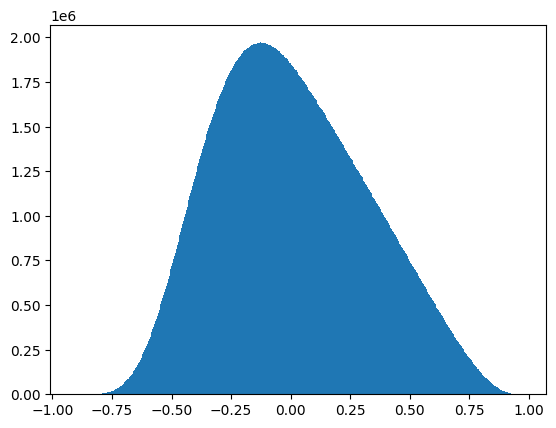

In [71]:
plt.hist(vals, bins=500)

In [77]:
dataset.df_tracks[dataset.df_tracks["artist"]=="Imagine Dragons"]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
6787,It's Time,872,Imagine Dragons,"[2231, 5737, 8418, 151773, 159195, 159196, 162...","['Night Visions (Deluxe Version)', 'Night Visi..."
6907,Amsterdam,872,Imagine Dragons,"[2231, 5737, 8786, 218016, 259737, 477292, 526...","['Night Visions (Deluxe Version)', 'Night Visi..."
6911,My Fault,872,Imagine Dragons,"[2231, 5737, 8418, 159195, 259737, 477292, 526...","['Night Visions (Deluxe Version)', 'Night Visi..."
6912,America,872,Imagine Dragons,"[2231, 5737, 218016, 259737, 477292, 526516, 2...","['Night Visions (Deluxe Version)', 'Night Visi..."
6914,Underdog,872,Imagine Dragons,"[2231, 5737, 259737, 477292, 526516, 1377213]","['Night Visions (Deluxe Version)', 'Night Visi..."
...,...,...,...,...,...
29449480,Radioactive,872,Imagine Dragons,"[5737, 8418, 159195, 159196, 263659, 583744, 9...","['Night Visions', 'Continued Silence EP', 'Con..."
29450270,It's Time,872,Imagine Dragons,"[5737, 8418, 151773, 159195, 159196, 353024, 4...","['Night Visions', 'Continued Silence EP', 'Con..."
29669345,Radioactive,872,Imagine Dragons,"[5737, 8418, 8786, 151773, 159195, 159196, 263...","['Night Visions', 'Continued Silence EP', 'Hea..."


In [289]:
model.track_map[53470]

31244

In [290]:
mod.track_enc.mat[model.track_map[53470]].reshape(1,-1).shape

torch.Size([1, 256])

In [291]:
dists = cosine_similarity(mod.track_enc.mat[model.track_map[53470]].reshape(1,-1).cpu().detach().numpy(), mod.track_enc.mat.cpu().detach().numpy())

In [292]:
dists[0].argsort()

array([199433,   6786, 152404, ..., 184206, 141070,  31244])

In [294]:
dataset.df_tracks.loc[model.rev_track_map[6786]]

track                                               Spiralling
artist_id                                                  190
artist                                                   Keane
albums_id    [3704, 68140, 177945, 204818, 220256, 288139, ...
albums       ['Greatest hits', 'Perfect Symmetry', 'Live Re...
Name: 10811, dtype: object

In [127]:
train[train["track_id"]==29449480]

,user_id,artist_id,album_id,track_id,timestamp,user_track_count
955236005,5666019,872,8418,29669345,1333550886,4
955828743,49519844,872,5737,29669345,1396714194,1
956070318,45738212,872,5737,29669345,1384816044,1
956692883,42832113,872,5737,29669345,1389655926,4
957084447,48743011,872,1849869,29669345,1403256345,1
...,...,...,...,...,...,...
1052517734,49180879,872,8418,29669345,1368974880,2
1052667168,49562722,872,5737,29669345,1378748242,1
1052679380,50075389,872,5737,29669345,1391557589,1
1052738423,49817650,872,5737,29669345,1396098733,1


In [193]:
gb = dataset.df_tracks.groupby(["artist", "track"]).size() 

In [194]:
(gb > 1).sum()

26629

In [136]:
gb.max()

13

In [137]:
len(gb)

783746

In [138]:
26629 / 783746

0.033976568939426806

In [ ]:
from tqdm import tqdm

In [351]:
def augment_df(train):
    mapper = {}
    for _, rows in train.groupby("artist_id"):
        vals = rows.groupby(rows["track_id"]).size().index.tolist()
        for v in vals:
            mapper[v] = vals
    # mapper now contains a dict with track_id: [ other track ids from same author ]

    new_rows_num = 1 # how many rows should be added for each existing row
    # TODO: choose users to enhance with criteria, instead of everybody

#         # TODO: if we use user_track_count in the future, 
#         # find a way of using having a meaningful value here 
#         # (e.g. avg # of listened songs)

#         # TODO: currently not weighting any song more than
#         # others -- this should be fairer towards unfrequent songs.
#         # consider whether additional weight should be put towards
#         # uncommon songs
#         # TODO: currently leaving the album untouched -- it should not be used as it is!
#         # TODO: instead of drawing from pool of author, what if we draw from pool of album? *** important test <===
    new_df = train.copy()
    new_df["track_id"] = new_df["track_id"].map(lambda x : np.random.choice(mapper[x]))
    return new_df

In [396]:
train.groupby("track_id")["artist_id"].size()

track_id
1           209
2            72
3            20
5            14
7            18
           ... 
31658615     22
31659046     35
31665210     15
32180331     19
32209343     10
Name: artist_id, Length: 227612, dtype: int64

In [400]:
test.merge(train.groupby("track_id")["artist_id"].size(), left_on="track_id", right_index=True)

,user_id,track_id,artist_id
1041546320,4830,544988,15
568722416,5834,641424,23
193011815,6958,361539,32
598577967,12628299,361539,32
641437710,15541,127026,66
...,...,...,...
696981232,50086315,737188,54
1052703729,50086335,1313765,20
1052712021,50087154,29528427,21
1049226535,50931921,22102249,23


In [401]:
test

,user_id,track_id
1041546320,4830,544988
568722416,5834,641424
193011815,6958,361539
641437710,15541,127026
433753164,1000450,1459220
...,...,...
696981232,50086315,737188
1052703729,50086335,1313765
1052712021,50087154,29528427
1049226535,50931921,22102249


In [354]:
from timeit import timeit

timeit(lambda: augment_df(train), number=1)

54.69843666208908

In [330]:
def augment_df(train):
    mapper = {}
    for _, rows in train.groupby("artist_id"):
        vals = rows.groupby(rows["track_id"]).size().index.tolist()
        for v in vals:
            mapper[v] = vals
    # mapper now contains a dict with track_id: [ other track ids from same author ]

    new_rows_num = 1 # how many rows should be added for each existing row
    # TODO: choose users to enhance with criteria, instead of everybody

    new_df = np.zeros((len(train) * new_rows_num, 6), dtype=int)
    print("Generating extra data...")
    for i, (_, row) in tqdm(enumerate(train.iterrows()), total=len(train)):
        # TODO: if we use user_track_count in the future, 
        # find a way of using having a meaningful value here 
        # (e.g. avg # of listened songs)

        # TODO: currently not weighting any song more than
        # others -- this should be fairer towards unfrequent songs.
        # consider whether additional weight should be put towards
        # uncommon songs
        # TODO: currently leaving the album untouched -- it should not be used as it is!
        # TODO: instead of drawing from pool of author, what if we draw from pool of album? *** important test <===
        new_df[i*new_rows_num:(i+1)*new_rows_num, :-1] = [ row.user_id, row.artist_id, -1, -1, 1 ]
        new_df[i*new_rows_num:(i+1)*new_rows_num, -1] = np.random.choice(mapper[row.track_id], size=new_rows_num)
#         for _ in range(new_rows_num):
#             new_df.append([ row.user_id, row.artist_id, np.random.choice(mapper[row.track_id]), -1, 1])
    
    return mapper, pd.DataFrame(columns=["user_id", "artist_id", "album_id", "timestamp", "user_track_count", "track_id"], data=new_df)

In [347]:
df_new = augment_df(train)

In [343]:
df_new.iloc[:10]

,user_id,artist_id,album_id,timestamp,user_track_count,track_id
0,31435741,13,-1,-1,1,1707
1,31435741,21,-1,-1,1,53
2,31435741,32,-1,-1,1,86
3,31435741,44,-1,-1,1,753
4,31435741,45,-1,-1,1,131
5,31435741,57,-1,-1,1,182
6,31435741,65,-1,-1,1,219
7,31435741,86,-1,-1,1,289
8,31435741,95,-1,-1,1,310
9,31435741,99,-1,-1,1,323


In [344]:
pd.concat([train[:10], df_new])


,user_id,artist_id,album_id,track_id,timestamp,user_track_count
35,31435741,13,15,17,1381747153,23
111,31435741,21,31,53,1369855872,54
195,31435741,32,46,86,1369568484,84
198,31435741,44,65,127,1369058705,3
317,31435741,45,67,131,1368809563,119
...,...,...,...,...,...,...
95,31435741,353,-1,2506,-1,1
96,3507776,872,-1,6907,-1,1
97,3507776,872,-1,6787,-1,1
98,3507776,872,-1,6907,-1,1


In [305]:
# train["user_id"]==31435741

,user_id,artist_id,album_id,track_id,timestamp,user_track_count
1001014797,47364966,2987993,15266237,30540920,1400363563,1
1011288902,39185606,2987993,15103273,30540920,1399915761,1
1023000038,49965459,2987993,15103273,30540920,1389315327,2
1024422244,49987893,2987993,15103273,30540920,1387852303,1
1027395674,36644962,2987993,15288810,30540920,1392481436,1
1029961380,49605330,2987993,15103273,30540920,1396388106,1
1030305772,49501309,2987993,15103273,30540920,1393099822,1
1032849941,48162807,2987993,15103273,30540920,1387375133,1
1032995614,48707004,2987993,15709288,30540920,1396404118,1
1033226220,47167773,2987993,15103273,30540920,1392686712,9


In [144]:
train

,user_id,artist_id,album_id,track_id,timestamp,user_track_count
35,31435741,13,15,17,1381747153,23
111,31435741,21,31,53,1369855872,54
195,31435741,32,46,86,1369568484,84
198,31435741,44,65,127,1369058705,3
317,31435741,45,67,131,1368809563,119
...,...,...,...,...,...,...
1052852448,49813688,16835,685125,18090682,1338280292,1
1052852451,49813688,2389,5193,14511,1337417750,1
1052852452,49813688,84717,359758,983496,1337417553,1
1052852453,49813688,73263,201517,568298,1337417279,1


In [225]:
train = train
df_tracks = dataset.df_tracks
df_tracks_dedup = df_tracks.copy()

In [226]:
train_dedup = train.copy()

In [237]:
len(df_tracks_dedup.groupby("artist_id"))

62605

In [238]:
len(df_tracks_dedup.groupby("artist"))

62605

In [239]:
len(df_tracks.groupby("artist"))

62605

In [240]:
mapper = {}
for artist_name, grp in df_tracks.groupby("artist"):
    counts = grp["artist_id"].value_counts()
    if len(counts) == 1: # no duplicates -- free to go
        mapper[counts.index[0]] = counts.index[0]
        continue
    
    unique_artist_id = counts.idxmax() # pick artist id of artist w/ largest # of songs
    # this id is then propagated to all other tracks in train
    
    for k in counts.index:
        mapper[k] = unique_artist_id
    
    art_id_set = set(counts.index)

train_dedup["artist_id"] = train_dedup["artist_id"].map(mapper.get)
df_tracks_dedup["artist_id"] = df_tracks_dedup["artist_id"].map(mapper.get)

In [261]:
mapper = { k: k for k in df_tracks.index }

In [262]:
drop_rows = []

mapper = { k: k for k in df_tracks.index }
for song_name, grp in df_tracks_dedup.groupby(["artist_id", "track"]):
    
    if len(grp) == 1:
        continue # no duplicate songs here
    
    unique_track_id = grp.index[0] # pick any one id -- computing the most frequent one is too expensive
    
    for k in grp.index:
        mapper[k] = grp.index[0]
    
#     trk_id_set = set(grp.index)
#     train_dedup.loc[train_dedup["track_id"].isin(trk_id_set), "track_id"] = unique_track_id
    drop_rows.extend(grp.index[1:])

train_dedup["track_id"] = train_dedup["track_id"].map(mapper.get)
df_tracks_dedup.drop(drop_rows, inplace=True)

In [260]:
df_tracks.artist.isna().sum()

198

In [253]:
for v in train["track_id"]:
    if v not in mapper:
        print(v)
        break

1667806


In [251]:
train_dedup["track_id"].isna().sum()

143

In [244]:
len(df_tracks)

820998

In [245]:
820998-783945

37053

In [247]:
len(train.groupby(["artist_id", "track_id"]))

228335

In [248]:
len(train_dedup.groupby(["artist_id", "track_id"]))

213222

In [195]:
(df_tracks_dedup.groupby(["artist_id", "track"]).size()>1).sum()

26630

In [175]:
art_id_set

{4207, 2872335}

In [179]:
(train["artist_id"] == 4207).sum()

5014

In [170]:
train_dedup["artist_id"].map(lambda x: x in art_id_set).sum()

8109

In [171]:
train_dedup["artist_id"].isin(art_id_set).sum()

8109

In [161]:
counts.idxmax()

4207

In [156]:
df_tracks[df_tracks["artist_id"]==2872335]

,track,artist_id,artist,albums_id,albums
track_id,,,,,
29447888,Kings and Queens,2872335,30 Seconds to Mars,"[14553500, 14554564, 14555583, 14568143, 14585...","['This Is War', 'This Is War', 'Kings and Quee..."
29448199,This Is War,2872335,30 Seconds to Mars,"[14553500, 14554564, 14565396, 14568143, 14581...","['This Is War', 'This Is War', 'Promo Only Mod..."
29448511,The Story,2872335,30 Seconds to Mars,"[14553741, 14553980, 14560137, 14560942, 14560...","['A Beautiful Lie', '30 Seconds to Mars', 'A B..."
29449154,Was It a Dream?,2872335,30 Seconds to Mars,"[14553741, 14553980, 14560137, 14560942, 14560...","['A Beautiful Lie', '30 Seconds to Mars', 'A B..."
29449155,The Kill,2872335,30 Seconds to Mars,"[14553741, 14553980, 14560942, 14560947, 14581...","['A Beautiful Lie', '30 Seconds to Mars', 'BEA..."
...,...,...,...,...,...
29909848,My Favorite Noise - Commentary,2872335,30 Seconds to Mars,[14613898],['Commentary Album']
29909849,The Echelon - Commentary,2872335,30 Seconds to Mars,[14613898],['Commentary Album']
29909850,The Other Pursuits - Commentary,2872335,30 Seconds to Mars,[14613898],['Commentary Album']
